In [9]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Quantum_internship/internship_train.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


In [4]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Model

In [6]:
# Split to train and validation
train_df = df[:80000]
val_df = df[80000:]

In [7]:
# Prepare train and validation labels and features
train_features_df = train_df.copy()
val_features_df = val_df.copy()
train_labels_df = train_features_df.pop('target')
val_labels_df = val_features_df.pop('target')

train_labels_df

0        20.107472
1        61.763713
2        74.651162
3        69.424645
4        66.767304
           ...    
79995    70.812669
79996    52.577894
79997     6.307532
79998     6.585729
79999    25.712923
Name: target, Length: 80000, dtype: float64

In [10]:
train_features = np.array(train_features_df)
val_features = np.array(val_features_df)

In [11]:
train_labels = np.array(train_labels_df)
val_labels = np.array(val_labels_df)

In [12]:
# Normalize input features
normalization_layer = keras.layers.Normalization()

normalization_layer.adapt(train_features)

In [13]:
# Building a simple DNN for regression
class MyModel(Model):

  def __init__(self, normalization_layer, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.normalize = normalization_layer
    self.hidden_layer = keras.layers.Dense(53, activation='relu', name='hidden_layer')
    self.output_layer = keras.layers.Dense(1, activation=None, name='output_layer')
  
  def call(self, inputs):
    x = self.normalize(inputs)
    x = self.hidden_layer(x)
    return self.output_layer(x)

In [14]:
# Check if GPU is available
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [15]:
model = MyModel(normalization_layer, name='my_model')

In [16]:
# Definig loss, optimizer, metric and compile model
optimizer = keras.optimizers.SGD(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

In [17]:
# Checking the model's summary
dummy_batch = tf.random.uniform(shape=(16, 53))

model(dummy_batch)

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  multiple                 107       
 n)                                                              
                                                                 
 hidden_layer (Dense)        multiple                  2862      
                                                                 
 output_layer (Dense)        multiple                  54        
                                                                 
Total params: 3,023
Trainable params: 2,916
Non-trainable params: 107
_________________________________________________________________


In [ ]:
!mkdir /content/model_checkpoints

In [ ]:
from datetime import datetime
import os

In [ ]:
# Defining checkpoint callback
ts = datetime.now().strftime('%Y%m%d_%H%M%S')

cp_file = 'my_dnn_regressor_checkpoint_' + ts + '_epoch-{epoch:02d}_val_rmse-{val_root_mean_squared_error:.4f}.ckpt'
cp_dir = '/content/model_checkpoints'

cp_path = os.path.join(cp_dir, cp_file)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=cp_path,
    monitor='val_root_mean_squared_error',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False
)

In [ ]:
# Training the model
with tf.device("GPU:0"):
  history = model.fit(train_features, 
                      train_labels, 
                      batch_size=16, 
                      epochs=50, 
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                  min_delta=0.001, 
                                                                  patience=5),
                                 cp_callback], 
                      validation_data=(val_features, val_labels), 
                      shuffle=True)

In [18]:
import matplotlib.pyplot as plt

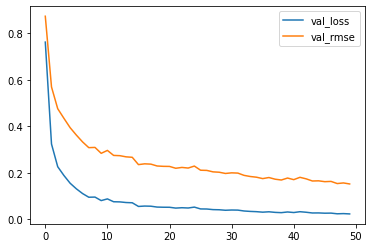

In [19]:
# Ploting training history
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='val_loss')
plt.plot(range(len(history.history['val_root_mean_squared_error'])), history.history['val_root_mean_squared_error'], label='val_rmse')
plt.legend(loc='best')
plt.show()

In [20]:
df_test = pd.read_csv("/content/drive/MyDrive/Quantum_internship/internship_hidden_test.csv")
df_test

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,221,246,314,406,464,317,6.708204,0.436684,1,205,...,1.272356,12.306512,7.778209,5.698493,10.023215,4.959409,4.056025,4.642375,4.533745,6.754558
9996,152,157,32,133,369,261,5.656854,0.986208,1,457,...,2.331195,13.176561,6.697370,4.119232,2.190155,14.555999,7.786794,9.414130,5.413161,4.134093
9997,349,240,355,97,93,176,4.690416,0.830543,1,287,...,14.423037,0.941523,3.555292,12.572057,7.058367,12.999451,1.901825,5.100031,1.498432,8.093801
9998,427,70,63,265,62,150,4.000000,0.502337,1,124,...,1.154640,1.593796,9.902159,2.548667,11.339210,14.192310,14.142207,9.966924,8.538981,7.036367


In [21]:
df_test.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
dtype: int64

In [22]:
test_features_df = df_test.copy()

In [23]:
test_features = np.array(test_features_df)

In [ ]:
# Making predictions on test set
predictions = model.predict(test_features)

print(type(predictions))
print(predictions)

In [ ]:
# Saving predictions

output_file = '/content/drive/MyDrive/Quantum_internship/predictions.npy'

np.save(output_file, predictions)

In [ ]:
# Saving model

model.save('/content/drive/MyDrive/Quantum_internship/regression_model/regression_model', save_format='tf')